In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# test commit
df = pd.read_csv('Salary.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [8]:
# dataset statistics.
print(df.describe())
print("\n")

# attribute counts and their datatypes.
print(df.info())

               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               N

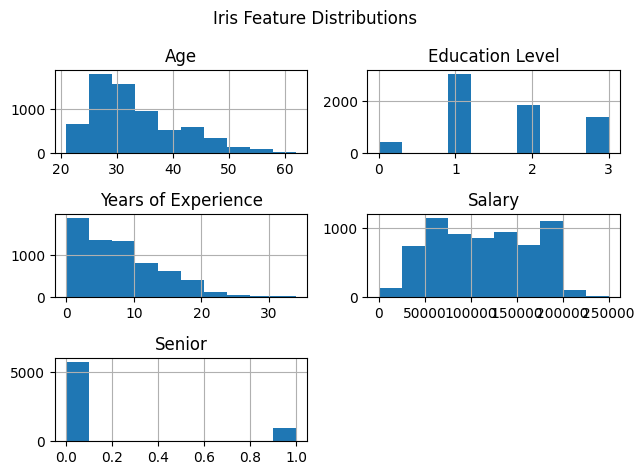

In [10]:
#histagram istribution.
df.hist()

plt.suptitle("Iris Feature Distributions")
plt.tight_layout()
plt.show()

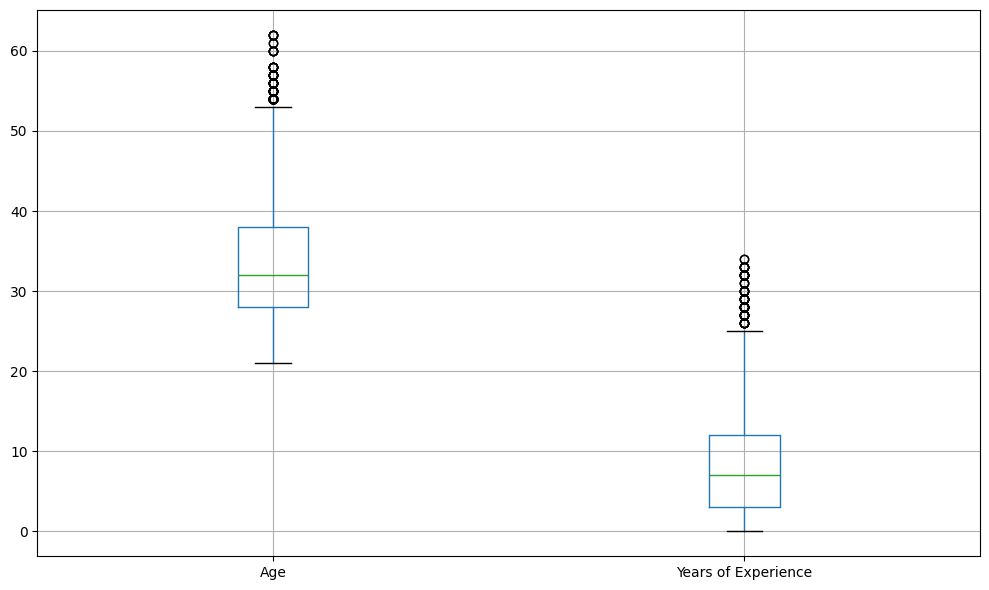

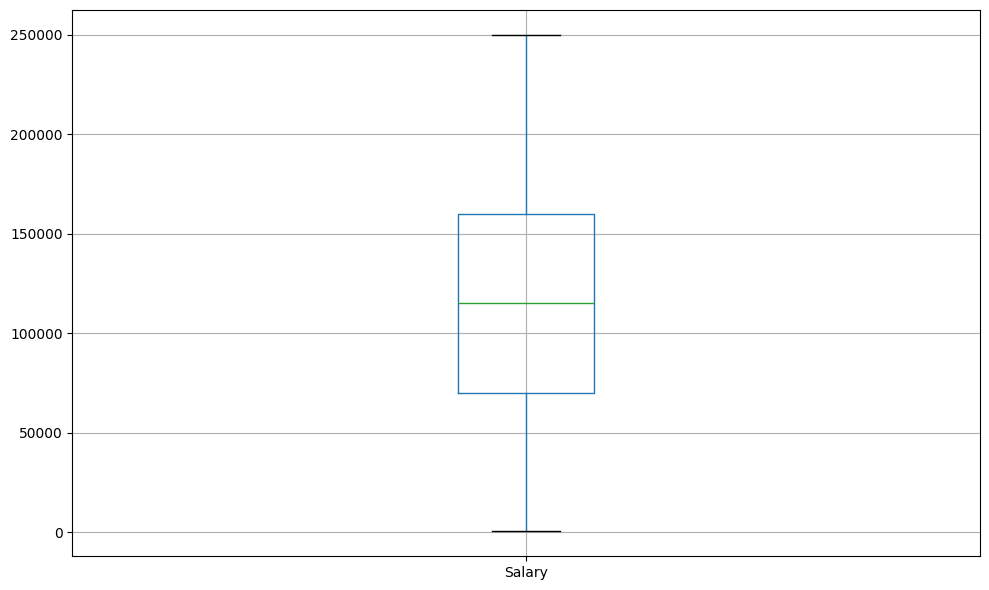

Age's upper outliers:
1209    61.0
1221    57.0
1223    62.0
1234    62.0
1238    55.0
        ... 
3041    54.0
3050    54.0
3067    54.0
3087    54.0
3103    54.0
Name: Age, Length: 119, dtype: float64
Years of Experience's upper outliers:
2382    30.0
2387    28.0
2391    33.0
2393    27.0
2396    33.0
        ... 
3059    26.0
3067    32.0
3087    30.0
3103    28.0
3109    26.0
Name: Years of Experience, Length: 69, dtype: float64


In [19]:
# find outliers with boxplot
df.boxplot(column=['Age', 'Years of Experience'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# salary graphed in a different graph because it has larger values
df.boxplot(column=['Salary'], figsize=(10, 6))
plt.tight_layout()
plt.show()

# find outliers in data (use code from discussion 1)
col_to_graph =['Age', 'Years of Experience', 'Salary']
for feature in col_to_graph:  # calculate for each of the identified attributes
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df[feature] < lower_bound
    outliers_upper = df[feature] > upper_bound

    # print the outliers
    if outliers_upper.any():
        print(f"{feature}'s upper outliers:\n{df.loc[outliers_upper, feature]}")
    if outliers_lower.any():
        print(f"{feature}'s lower outliers:\n{df.loc[outliers_lower, feature]}")